In [1]:
import numpy as np

# Load the dataset
data = np.loadtxt('seeds.txt')

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# K-means clustering function
def k_means(data, k, max_iter=100, tol=0.001, num_initializations=10):
    best_sse_avg = 0
    for _ in range(num_initializations):
        # Randomly initialize centroids
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]
        prev_sse = float('inf')

        for iteration in range(max_iter):
            # Assign each data point to the nearest centroid
            clusters = [[] for _ in range(k)]
            for point in data:
                distances = [euclidean_distance(point, centroid) for centroid in centroids]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(point)

            # Update centroids
            new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])

            # Calculate SSE (Sum of Squared Errors)
            sse = sum([sum(euclidean_distance(point, new_centroids[i])**2 for point in cluster) for i, cluster in enumerate(clusters)])

            # Check convergence
            if abs(prev_sse - sse) < tol:
                break
            prev_sse = sse
            centroids = new_centroids

        # Store the SSE
        best_sse_avg += sse

    # Average SSE over the initializations
    return best_sse_avg / num_initializations

# Run K-means for k = 3, 5, 7
ks = [3, 5, 7]
sse_results = {}
for k in ks:
    avg_sse = k_means(data, k)
    sse_results[k] = avg_sse
    print(f"Average SSE for k = {k}: {avg_sse:.4f}")


Average SSE for k = 3: 587.9040
Average SSE for k = 5: 406.3259
Average SSE for k = 7: 307.0033


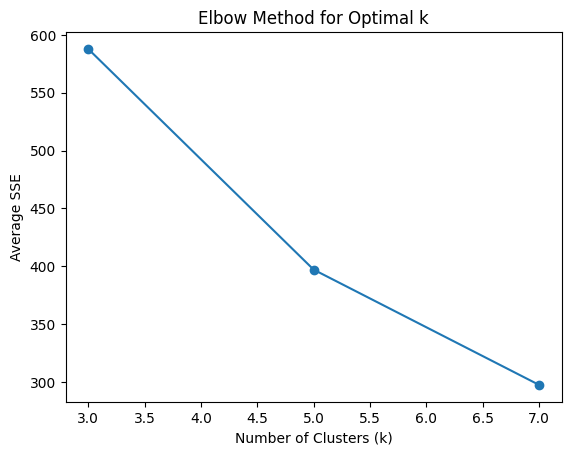

In [2]:
import matplotlib.pyplot as plt

ks = [3, 5, 7]
sse_values = [587.9040, 397.1302, 297.4990]

plt.plot(ks, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average SSE')
plt.show()

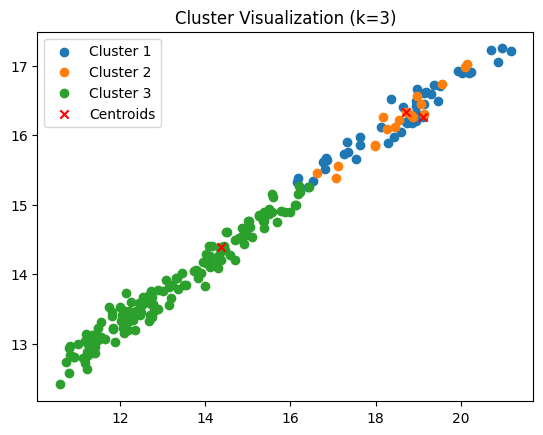

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Assuming k=3 for simplicity
centroids = data[np.random.choice(data.shape[0], 3, replace=False)]
clusters = [[] for _ in range(3)]
for point in data:
    distances = [np.linalg.norm(point - centroid) for centroid in centroids]
    cluster_idx = np.argmin(distances)
    clusters[cluster_idx].append(point)

for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', label='Centroids')
plt.legend()
plt.title('Cluster Visualization (k=3)')
plt.show()
